# Feature important

#### import

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from pydataset import data
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


#### โหลดข้อมูล

In [26]:
print(data())

        dataset_id                                             title
0    AirPassengers       Monthly Airline Passenger Numbers 1949-1960
1          BJsales                 Sales Data with Leading Indicator
2              BOD                         Biochemical Oxygen Demand
3     Formaldehyde                     Determination of Formaldehyde
4     HairEyeColor         Hair and Eye Color of Statistics Students
..             ...                                               ...
752        VerbAgg                  Verbal Aggression item responses
753           cake                 Breakage Angle of Chocolate Cakes
754           cbpp                 Contagious bovine pleuropneumonia
755    grouseticks  Data on red grouse ticks from Elston et al. 2001
756     sleepstudy       Reaction times in a sleep deprivation study

[757 rows x 2 columns]


In [27]:
df = data('cancer')
print(df.head())

   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
1   3.0   306       2   74    1      1.0      90.0      100.0    1175.0   
2   3.0   455       2   68    1      0.0      90.0       90.0    1225.0   
3   3.0  1010       1   56    1      0.0      90.0       90.0       NaN   
4   5.0   210       2   57    1      1.0      90.0       60.0    1150.0   
5   1.0   883       2   60    1      0.0     100.0       90.0       NaN   

   wt.loss  
1      NaN  
2     15.0  
3     15.0  
4     11.0  
5      0.0  


#### ตรวจสอบข้อมูลที่มี missing values และลบทิ้ง

In [28]:
df = df.dropna()
print(df.head())

   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
2   3.0   455       2   68    1      0.0      90.0       90.0    1225.0   
4   5.0   210       2   57    1      1.0      90.0       60.0    1150.0   
6  12.0  1022       1   74    1      1.0      50.0       80.0     513.0   
7   7.0   310       2   68    2      2.0      70.0       60.0     384.0   
8  11.0   361       2   71    2      2.0      60.0       80.0     538.0   

   wt.loss  
2     15.0  
4     11.0  
6      0.0  
7     10.0  
8      1.0  


#### เลือกตัวแปรอิสระ (X) และตัวแปรตาม (y)

In [29]:
X = df[['time','status','sex','ph.ecog','pat.karno','meal.cal','wt.loss']]
y = df['age']

#### แบ่งข้อมูลเป็นชุดการฝึกและทดสอบ

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

#### สร้างและฝึกโมเดล RandomForestRegressor

In [31]:
h = RandomForestRegressor(n_estimators=100, random_state=1)
h.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

#### ทำนายผลตัวทดสอบ

In [32]:
y_pred = h.predict(x_test)

#### คำนวณ Mean Squared Error

In [33]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 67.87276274509804


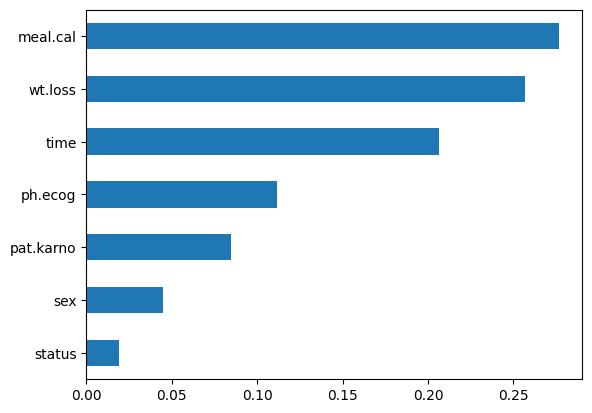

In [34]:
model_ranks = pd.Series(h.feature_importances_, index=x_train.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')

#### Calculate Residuals

In [35]:
residuals = y_test - y_pred

#### Calculate RSS

In [36]:
rss = sum(residuals**2)
print("Residual Sum of Squares (RSS):", rss)

Residual Sum of Squares (RSS): 3461.5108999999998


#### Get feature importances

In [37]:
feature_importances  = h.feature_importances_

#### Create a DataFrame to store feature importances with corresponding feature names

In [38]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


#### Sort the DataFrame by importance in descending order

In [39]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#### Print feature importances

In [40]:
print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
     Feature  Importance
5   meal.cal    0.276526
6    wt.loss    0.256943
0       time    0.206354
3    ph.ecog    0.111414
4  pat.karno    0.084826
2        sex    0.044582
1     status    0.019355


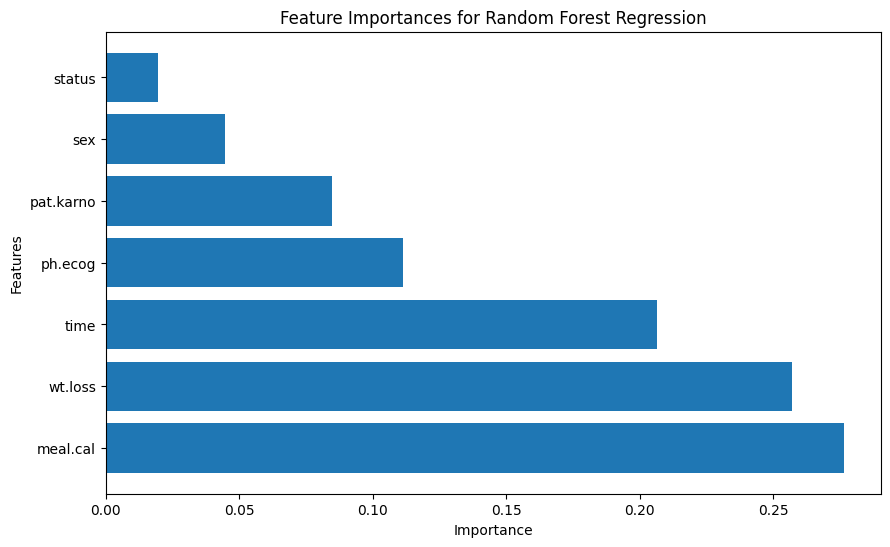

In [41]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances for Random Forest Regression')
plt.show()

In [44]:
# df.corr()